# House price prediction regression project

# Project Goal 
To determine the price of house.

## load modules / Libraries

In [1]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar


from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

## load datasets

In [2]:
train_data_path = r"C:\MACHINE LEARNING DATA SETS\data\train.csv" 
test_data_path = r"C:\MACHINE LEARNING DATA SETS\data\test.csv"


df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

print("shape of df_train: ", df_train.shape)
print("shape of df_test: ", df_test.shape)

shape of df_train:  (1460, 81)
shape of df_test:  (1459, 80)


In [3]:
pd.set_option("display.max_columns" , None)
pd.set_option("display.max_rows" , None)

In [4]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [5]:
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd        NaN   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd        NaN   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard        NaN   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

## Know your data

## DATA INTEGRATION

In [6]:
df = pd.concat([df_train, df_test])
print("shape of integrated data / DF: " , df.shape)

shape of integrated data / DF:  (2919, 81)


In [7]:
df.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ       706.0          Unf         0.0      150.0        856.0   
1          ALQ       978.0          Unf         0.0      284.0       1262.0   
2          GLQ       486.0          Unf         0.0      434.0        920.0   
3          ALQ       216.0          Unf         0.0      540.0        756.0   
4          GLQ       655.0          Unf         0.0      490.0       1145.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710           1.0           0.0         2         1             3   
1       1262           0.0           1.0         2         0             3   
2       1786           1.0           0.0         2         1             3   
3       1717           1.0           0.0         1         0             3   
4       2198           1.0           0.0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [8]:
df.tail(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1454         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1455         Lvl    AllPub    Inside       Gtl      MeadowV       Norm   
1456         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1457         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
1458         Lvl    AllPub    Inside       Mod      Mitchel       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1454       Norm    Twnhs     2Story            4            7       1970   
1455       Norm   TwnhsE     2Story            4            5       1970   
1456       Norm     1Fam     1Story            5            7       1960   
1457       Norm     1Fam     SFoyer            5            5       1992   
1458       Norm     1Fam     2Story            7            5       1993   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1454          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1455          1970     Gable  CompShg     CemntBd     CmentBd        NaN   
1456          1996     Gable  CompShg     VinylSd     VinylSd        NaN   
1457          1992     Gable  CompShg     HdBoard     Wd Shng        NaN   
1458          1994     Gable  CompShg     HdBoard     HdBoard    BrkFace   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1454         0.0        TA        TA     CBlock       TA       TA   
1455         0.0        TA        TA     CBlock       TA       TA   
1456         0.0        TA        TA     CBlock       TA       TA   
1457         0.0        TA        TA      PConc       Gd       TA   
1458        94.0        TA        TA      PConc       Gd       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1454           No          Unf         0.0          Unf         0.0   
1455           No          Rec       252.0          Unf         0.0   
1456           No          ALQ      1224.0          Unf         0.0   
1457           Av          GLQ       337.0          Unf         0.0   
1458           Av          LwQ       758.0          Unf         0.0   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1454      546.0        546.0    GasA        Gd          Y      SBrkr   
1455      294.0        546.0    GasA        TA          Y      SBrkr   
1456        0.0       1224.0    GasA        Ex          Y      SBrkr   
1457      575.0        912.0    GasA        TA          Y      SBrkr   
1458      238.0        996.0    GasA        Ex          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1454       546       546             0       1092           0.0           0.0   
1455       546       546             0       1092           0.0           0.0   
1456      1224         0             0       1224           1.0           0.0   
1457       970         0             0        970           0.0           1.0   
1458       996      1004             0       2000           0.0           0.0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1454         1         1             3             1          TA   
1455         1         1             3             1          TA   
1456         1         0             4             1          TA   
1457         1         0             3             1          TA   
1458         2         1             3             1          TA   

   

## Get the brief Information of dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [10]:
int_features = df.select_dtypes(include=["int64"]).columns
print("total number of integer features : ", int_features.shape[0])


print("integer feature names : ", int_features.tolist())

total number of integer features :  26
integer feature names :  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [11]:
float_features = df.select_dtypes(include=["float64"]).columns
print("total number of floating features : ", float_features.shape[0])


print("float feature names : ", float_features.tolist())

total number of floating features :  12
float feature names :  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [12]:
cat_features = df.select_dtypes(include=["object"]).columns
print("total number of categorical features : ", cat_features.shape[0])


print("categorical feature names : ", cat_features.tolist())

total number of categorical features :  43
categorical feature names :  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the statistical information of numerical features

In [13]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  2919.000000  2919.000000  2433.000000    2919.000000  2919.000000   
mean   1460.000000    57.137718    69.305795   10168.114080     6.089072   
std     842.787043    42.517628    23.344905    7886.996359     1.409947   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     730.500000    20.000000    59.000000    7478.000000     5.000000   
50%    1460.000000    50.000000    68.000000    9453.000000     6.000000   
75%    2189.500000    70.000000    80.000000   11570.000000     7.000000   
max    2919.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  2919.000000  2919.000000   2919.000000  2896.000000  2918.000000   
mean      5.564577  1971.312778   1984.264474   102.201312   441.423235   
std       1.113131    30.291442     20.894344   179.334253   455.610826   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1953.500000   1965.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1993.000000     0.000000   368.500000   
75%       6.000000  2001.000000   2004.000000   164.000000   733.000000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  2918.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean     49.582248   560.772104  1051.777587  1159.581706   336.483727   
std     169.205611   439.543659   440.766258   392.362079   428.701456   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   220.000000   793.000000   876.000000     0.000000   
50%       0.000000   467.000000   989.500000  1082.000000     0.000000   
75%       0.000000   805.500000  1302.000000  1387.500000   704.000000   
max    1526.000000  2336.000000  6110.000000  5095.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   2919.000000  2919.000000   2917.000000   2917.000000  2919.000000   
mean       4.694416  1500.759849      0.429894      0.061364     1.568003   
std       46.396825   506.051045      0.524736      0.245687     0.552969   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1126.000000      0.000000      0.000000     1.000000   
50%        0.000000  1444.000000      0.000000      0.000000     2.000000   
75%        0.000000  1743.500000      1.000000      0.000000     2.000000   
max     1064.000000  5642.000000      3.000000      2.000000     4.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  2919.000000   2919.000000   2919.000000   2919.000000  2919.000000   
mean      0.380267      2.860226      1.044536      6.451524     0.597122   
std       0.502872      0.822693      0.214462      1.569379     0.646129   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     15.000000     4.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  2760.000000  2918.000000  2918.000000  2919.000000  2919.000000   
mean   1978.113406     1.766621   472.874572    93.709832    47.486811   
std      25.574285     0.761624   215.394815   126.526589    67.575493   
min    1895.000000     0.000000     0.000000     0.000000     0.000000   
25%    1960.000000     1.000000   320.000000     0.000000     0.000000   
50%    1979.000000     2.000000   480.000000     0.000000    26.000000   
75%    2002.000000     2.000000   576.000000   168.000000    70.000000   
max    2

In [14]:
df.describe().shape

(8, 38)

In [15]:
df["MSSubClass"]

0        60
1        20
2        60
3        70
4        60
5        50
6        20
7        60
8        50
9       190
10       20
11       60
12       20
13       20
14       20
15       45
16       20
17       90
18       20
19       20
20       60
21       45
22       20
23      120
24       20
25       20
26       20
27       20
28       20
29       30
30       70
31       20
32       20
33       20
34      120
35       60
36       20
37       20
38       20
39       90
40       20
41       20
42       85
43       20
44       20
45      120
46       50
47       20
48      190
49       20
50       60
51       50
52       90
53       20
54       80
55       20
56      160
57       60
58       60
59       20
60       20
61       75
62      120
63       70
64       60
65       60
66       20
67       20
68       30
69       50
70       20
71       20
72       60
73       20
74       50
75      180
76       20
77       50
78       90
79       50
80       60
81      120
82       20
83  

## Handling Missing Values

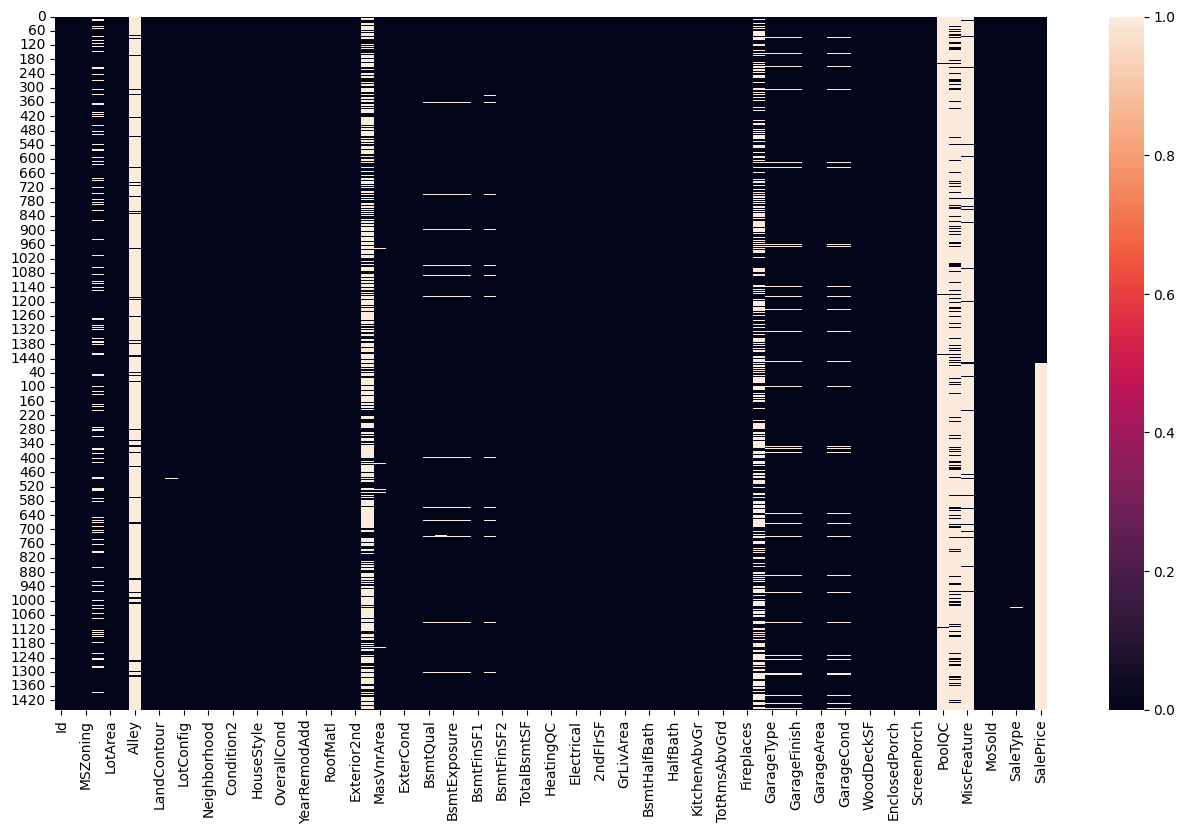

In [16]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())
plt.savefig("eda_img/heatmap_DF_of_null_values.png")

In [17]:
train_data_path = r"C:\MACHINE LEARNING DATA SETS\data\train.csv" 
test_data_path = r"C:\MACHINE LEARNING DATA SETS\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# Concatenate datasets
df = pd.concat([df_train, df_test])
print("shape of integrated data / DF: ", df.shape)

# Set index as ID column
df = df.set_index("Id")

shape of integrated data / DF:  (2919, 81)


In [18]:
null_count = df.isnull().sum()
pd.set_option("display.max_rows" , None)
null_count


MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [19]:
null_percent = df.isnull().sum()/df.shape[0] * 100
pd.set_option("display.max_rows" , None)
null_percent


MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

In [20]:
null_percent = df.isnull().sum()
pd.set_option("display.max_rows" , None)
null_percent


MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [21]:
null_percent = df.isnull().sum()/df.shape[0] * 100
pd.set_option("display.max_rows" , None)
null_percent

MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType       60.500171
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## drop columns / Features

In [22]:
miss_value_50_perc = null_percent[null_percent >50]
miss_value_50_perc



Alley          93.216855
MasVnrType     60.500171
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [23]:
df["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [24]:
miss_value_20_50_perc = null_percent[(null_percent >20) & (null_percent <51)]
miss_value_20_50_perc


FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [25]:
# Assuming null_percent is a pandas Series or DataFrame column containing percentages of null values
import pandas as pd

# Assuming you have loaded the dataset into a DataFrame named df
# Load datasets
train_data_path = r"C:\MACHINE LEARNING DATA SETS\data\train.csv" 
test_data_path = r"C:\MACHINE LEARNING DATA SETS\data\test.csv"

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

# Concatenate datasets
df = pd.concat([df_train, df_test])
print("shape of integrated data / DF: ", df.shape)

# Set index as ID column
df = df.set_index("Id")

null_percent = df.isnull().sum()/df.shape[0] * 100
pd.set_option("display.max_rows" , None)
null_percent
miss_value_5_20_perc = null_percent[(null_percent > 5) & (null_percent < 21)]
miss_value_5_20_perc

shape of integrated data / DF:  (2919, 81)


LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [26]:
df["LotFrontage"].value_counts().head()

LotFrontage
60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: count, dtype: int64

<Axes: ylabel='Id'>

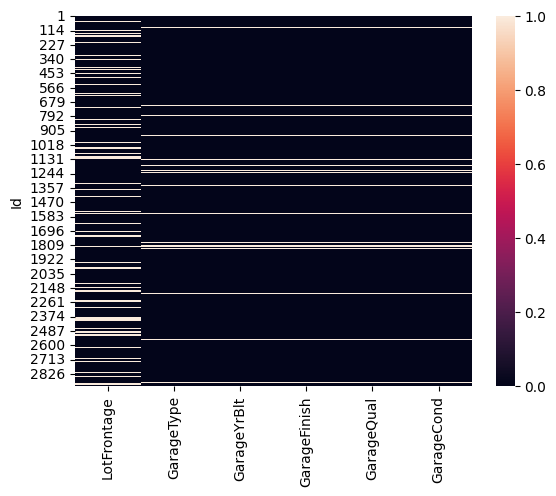

In [27]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())


## missing value imputation

In [28]:
missing_value_feat = null_percent[null_percent > 0]
print("total missing value features = ", len(missing_value_feat))


total missing value features =  35


In [29]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [30]:
cat_na_feat = missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("print total number of categorcial missing features = " , len(cat_na_feat))
cat_na_feat

print total number of categorcial missing features =  23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [31]:
int_na_feat = missing_value_feat[missing_value_feat.keys().isin(int_features)]
print("print total number of integer missing features = " , len(int_na_feat))
int_na_feat

print total number of integer missing features =  0


Series([], dtype: float64)

In [32]:
float_na_feat = missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("print total number of float missing features = " , len(float_na_feat))
float_na_feat

print total number of float missing features =  12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling Missing Features : MSZoning = 0.137033

In [33]:
df["MSZoning"].value_counts()


MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

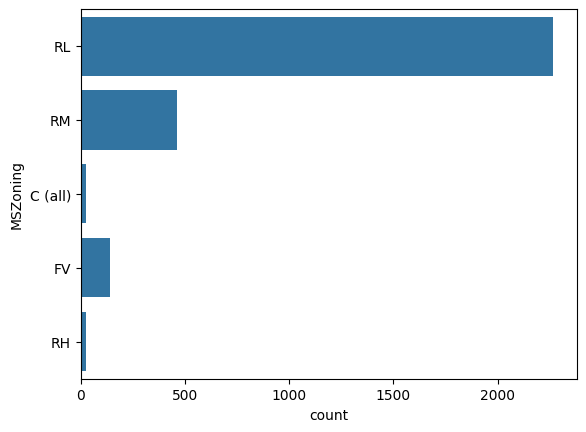

In [34]:
sns.countplot(df["MSZoning"])

In [35]:
### backup of original data 
df_mvi = df.copy()
df_mvi.shape

(2919, 80)

In [36]:
mszoning_mode = df["MSZoning"].mode()[0]
df_mvi["MSZoning"].replace(np.nan, mszoning_mode, inplace = True)
df_mvi["MSZoning"].isnull().sum()



0

In [37]:
def oldNewCountPlot(df, df_new, feature):
    plt.subplot(121)
    sns.countplot(df[feature])
    plt.title("old data distribution")
    plt.subplot(122)
    sns.countplot(df_new[feature])
    plt.title("new data distribution")

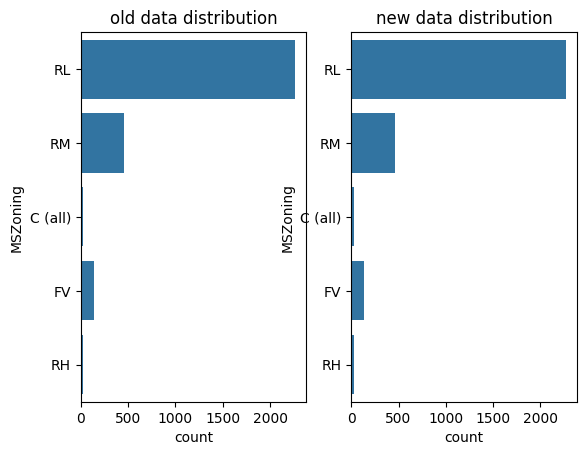

In [38]:
oldNewCountPlot(df, df_mvi, "MSZoning")


### Handling alley 93.216855

In [39]:
df_mvi["Alley"].value_counts()

Alley
Grvl    120
Pave     78
Name: count, dtype: int64

In [40]:
alley_cont = "NA"
df_mvi["Alley"].replace(np.nan, alley_cont  , inplace = True)
df_mvi["Alley"].isnull().sum()

0

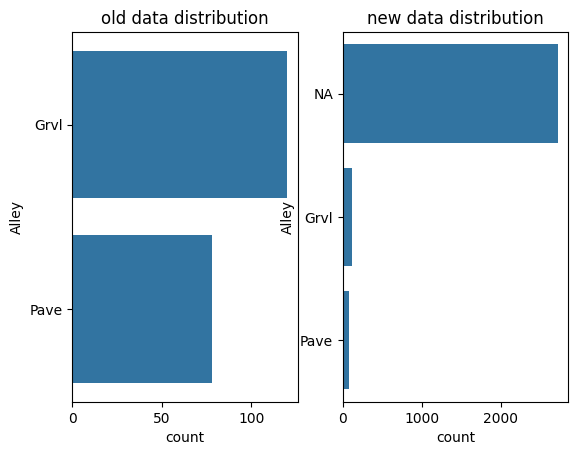

In [41]:
oldNewCountPlot(df, df_mvi, "Alley")

### LotFrontage     16.649538

In [42]:
def boxHistPlot(df , figsize=(16,5)):
    plt.figure(figsize = figsize)
    plt.subplot(121)
    sns.boxplot(df)
    plt.subplot(122)
    sns.histplot(df)

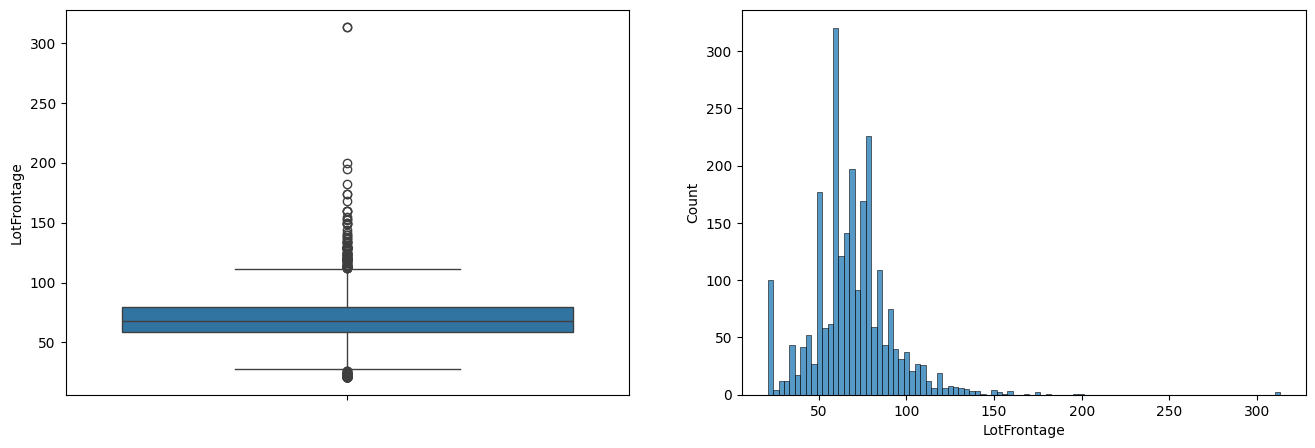

In [43]:
boxHistPlot(df["LotFrontage"])

In [44]:
lotfrontage_mean = df["LotFrontage"].mean()
df_mvi["LotFrontage"].replace(np.nan, lotfrontage_mean  , inplace = True)
df_mvi["LotFrontage"].isnull().sum()

0

In [45]:
def oldNewBoxHistPlot(df, df_new, feature , figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(221)
    sns.boxplot(df[feature])
    plt.title("old data distribution")
    plt.subplot(222)
    sns.distplot(df[feature])
    plt.title("old data distribution")
    
    plt.subplot(223)
    sns.boxplot(df_new[feature])
    plt.title("new data distribution")
    plt.subplot(224)
    sns.distplot(df_new[feature])
    plt.title("new data distribution")

C:\Users\HP\AppData\Local\Temp\ipykernel_29992\3041334132.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[feature])
C:\Users\HP\AppData\Local\Temp\ipykernel_29992\3041334132.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[feature])


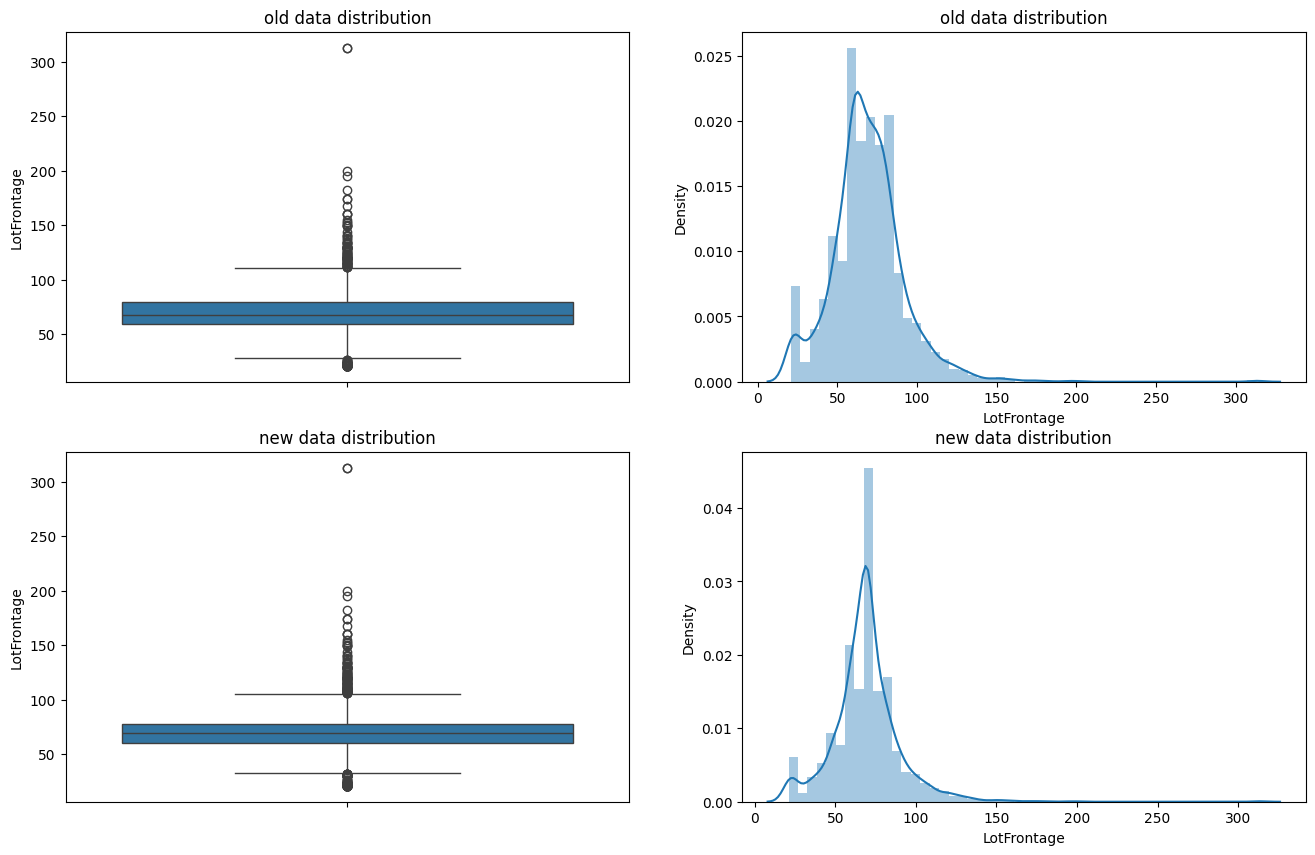

In [46]:
oldNewBoxHistPlot(df, df_mvi, "LotFrontage" )


### Handling Utilities = 0.068517

In [47]:
df["Utilities"].value_counts()

Utilities
AllPub    2916
NoSeWa       1
Name: count, dtype: int64

In [48]:
utilities_mode = df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan, utilities_mode  , inplace = True)
df_mvi["Utilities"].isnull().sum()

0

### Handling Exterior 1st = 0.034258    Exterior 2nd = 0.034258

In [49]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [50]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [51]:
exterior1st_mode = df["Exterior1st"].mode()[0]
exterior2nd_mode = df["Exterior2nd"].mode()[0]
df_mvi["Exterior1st"].replace(np.nan, exterior1st_mode  , inplace = True)
df_mvi["Exterior2nd"].replace(np.nan, exterior2nd_mode  , inplace = True)
print("E1st is null : ", df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null : ", df_mvi["Exterior2nd"].isnull().sum())

E1st is null :  0
E2nd is null :  0


### Handling MasVnrType = 60.500171   MasVnrArea = 0.787941

<Axes: ylabel='Id'>

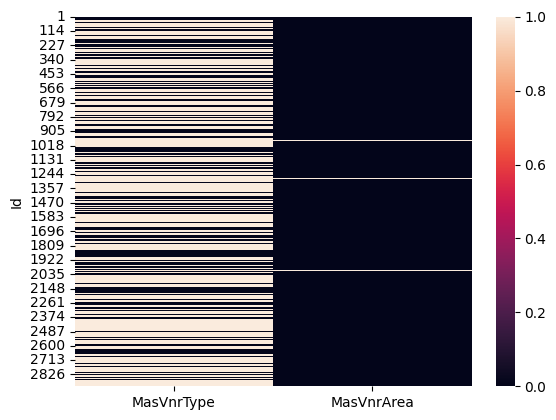

In [52]:
 sns.heatmap (df[["MasVnrType" , "MasVnrArea"]].isnull())

In [53]:
df[df[["MasVnrType", "MasVnrArea"]].isnull().any(axis=1)]


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
2             20       RL         80.0     9600   Pave   NaN      Reg   
4             70       RL         60.0     9550   Pave   NaN      IR1   
6             50       RL         85.0    14115   Pave   NaN      IR1   
9             50       RM         51.0     6120   Pave   NaN      Reg   
10           190       RL         50.0     7420   Pave   NaN      Reg   
11            20       RL         70.0    11200   Pave   NaN      Reg   
13            20       RL          NaN    12968   Pave   NaN      IR2   
16            45       RM         51.0     6120   Pave   NaN      Reg   
18            90       RL         72.0    10791   Pave   NaN      Reg   
19            20       RL         66.0    13695   Pave   NaN      Reg   
20            20       RL         70.0     7560   Pave   NaN      Reg   
22            45       RM         57.0     7449   Pave  Grvl      Reg   
24           120       RM         44.0     4224   Pave   NaN      Reg   
25            20       RL          NaN     8246   Pave   NaN      IR1   
27            20       RL         60.0     7200   Pave   NaN      Reg   
29            20       RL         47.0    16321   Pave   NaN      IR1   
30            30       RM         60.0     6324   Pave   NaN      IR1   
31            70  C (all)         50.0     8500   Pave  Pave      Reg   
32            20       RL          NaN     8544   Pave   NaN      IR1   
33            20       RL         85.0    11049   Pave   NaN      Reg   
34            20       RL         70.0    10552   Pave   NaN      IR1   
37            20       RL        112.0    10859   Pave   NaN      Reg   
39            20       RL         68.0     7922   Pave   NaN      Reg   
40            90       RL         65.0     6040   Pave   NaN      Reg   
42            20       RL        115.0    16905   Pave   NaN      Reg   
43            85       RL          NaN     9180   Pave   NaN      IR1   
44            20       RL          NaN     9200   Pave   NaN      IR1   
45            20       RL         70.0     7945   Pave   NaN      Reg   
47            50       RL         48.0    12822   Pave   NaN      IR1   
48            20       FV         84.0    11096   Pave   NaN      Reg   
49           190       RM         33.0     4456   Pave   NaN      Reg   
50            20       RL         66.0     7742   Pave   NaN      Reg   
51            60       RL          NaN    13869   Pave   NaN      IR2   
52            50       RM         52.0     6240   Pave   NaN      Reg   
53            90       RM        110.0     8472   Grvl   NaN      IR2   
54            20       RL         68.0    50271   Pave   NaN      IR1   
55            80       RL         60.0     7134   Pave   NaN      Reg   
58            60       RL         89.0    11645   Pave   NaN      IR1   
60            20       RL         60.0     7200   Pave   NaN      Reg   
61            20       RL         63.0    13072   Pave   NaN      Reg   
62            75       RM         60.0     7200   Pave   NaN      Reg   
64            70       RM         50.0    10300   Pave   NaN      IR1   
69            30       RM         47.0     4608   Pave   NaN      Reg   
70            50       RL         81.0    15593   Pave   NaN      Reg   
72            20       RL         69.0     7599   Pave   NaN      Reg   
75            50       RM         60.0     5790   Pave   NaN      Reg   
76           180       RM         21.0     1596   Pave   NaN      Reg   
77            20       RL          NaN     8475   Pave   NaN      IR1   
78            50       RM         50.0     8635   Pave   NaN      Reg   
79            90       RL         72.0    10778   Pave   NaN      Reg   
80            50       RM         60.0    10440   Pave  Grvl      Reg   
87            60       RL        122.0    11911   Pave   NaN      IR2   
89            50  C (all)        105.0     8470   Pave   NaN    

In [54]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    879
Stone      249
BrkCmn      25
Name: count, dtype: int64

In [55]:
masvnrtype_mode = df["MasVnrType"].mode()[0]
df_mvi["MasVnrType"].replace(np.nan, masvnrtype_mode  , inplace = True)
df_mvi["MasVnrType"].isnull().sum()

0

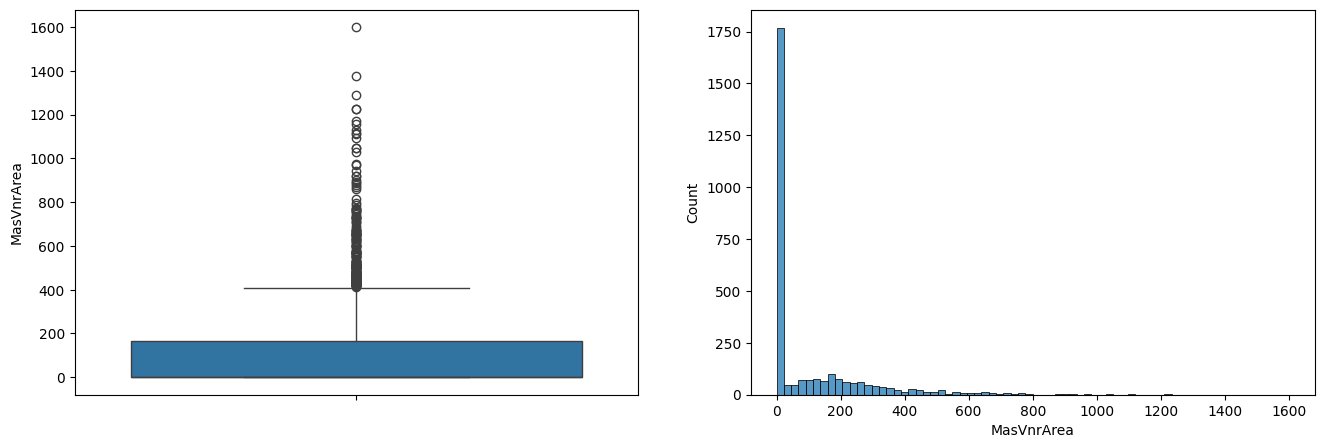

In [56]:
boxHistPlot(df["MasVnrArea"])

In [57]:
masvnrarea_cont = 0 
df_mvi["MasVnrArea"].replace(np.nan, masvnrarea_cont  , inplace = True)
df_mvi["MasVnrArea"].isnull().sum()

0

### Handling bsmt feat

In [58]:
"""cat_bsmt_feat = BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665

num_bsmt_feat =
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
BsmtFullBath      0.068517
BsmtHalfBath      0.068517"""

'cat_bsmt_feat = BsmtQual          2.774923\nBsmtCond          2.809181\nBsmtExposure      2.809181\nBsmtFinType1      2.706406\nBsmtFinSF1        0.034258\nBsmtFinType2      2.740665\n\nnum_bsmt_feat =\nBsmtFinSF2        0.034258\nBsmtUnfSF         0.034258\nTotalBsmtSF       0.034258\nBsmtFullBath      0.068517\nBsmtHalfBath      0.068517'

In [59]:
cat_bsmt_feat = ["BsmtQual" ,           
"BsmtCond" ,          
"BsmtExposure" ,     
"BsmtFinType1" ,     
"BsmtFinSF1" ,        
"BsmtFinType2"]       

num_bsmt_feat = ["BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","BsmtFullBath","BsmtHalfBath"]     

<Axes: ylabel='Id'>

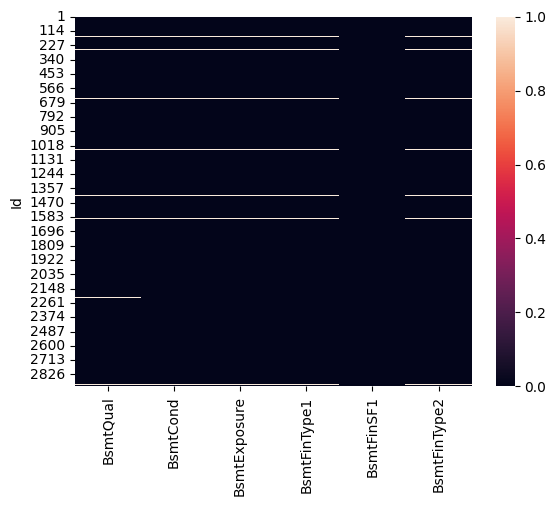

In [60]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [61]:
for feat in cat_bsmt_feat :
    print(f"value count of {feat} : {df[feat].value_counts()}")

value count of BsmtQual : BsmtQual
TA    1283
Gd    1209
Ex     258
Fa      88
Name: count, dtype: int64
value count of BsmtCond : BsmtCond
TA    2606
Gd     122
Fa     104
Po       5
Name: count, dtype: int64
value count of BsmtExposure : BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
Name: count, dtype: int64
value count of BsmtFinType1 : BsmtFinType1
Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: count, dtype: int64
value count of BsmtFinSF1 : BsmtFinSF1
0.0       929
24.0       27
16.0       14
300.0       9
288.0       8
384.0       8
600.0       8
20.0        8
700.0       7
500.0       7
602.0       7
456.0       7
624.0       7
375.0       7
936.0       7
360.0       7
312.0       6
468.0       6
528.0       6
120.0       6
625.0       6
588.0       6
662.0       6
504.0       6
276.0       6
544.0       6
553.0       6
560.0       6
368.0       6
547.0       6
336.0       5
648.0       5
196.0       5
28.0        5
144.0       5
1200.0      5

In [62]:
bsmt_cont = "NA"
for feat in cat_bsmt_feat :
    df_mvi[feat].replace(np.nan , bsmt_cont , inplace = True )

In [63]:
df_mvi[cat_bsmt_feat].isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

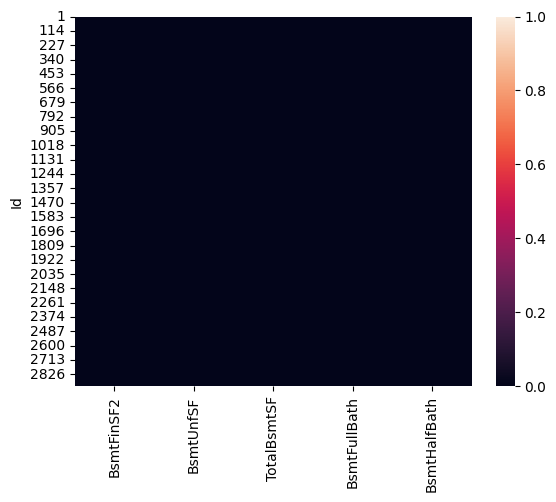

In [64]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [65]:
df_bsmt = df [cat_bsmt_feat + num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis = 1)]

BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  \
Id                                                                          
18        NaN      NaN          NaN          NaN         0.0          NaN   
40        NaN      NaN          NaN          NaN         0.0          NaN   
91        NaN      NaN          NaN          NaN         0.0          NaN   
103       NaN      NaN          NaN          NaN         0.0          NaN   
157       NaN      NaN          NaN          NaN         0.0          NaN   
183       NaN      NaN          NaN          NaN         0.0          NaN   
260       NaN      NaN          NaN          NaN         0.0          NaN   
333        Gd       TA           No          GLQ      1124.0          NaN   
343       NaN      NaN          NaN          NaN         0.0          NaN   
363       NaN      NaN          NaN          NaN         0.0          NaN   
372       NaN      NaN          NaN          NaN         0.0          NaN   
393       NaN      NaN          NaN          NaN         0.0          NaN   
521       NaN      NaN          NaN          NaN         0.0          NaN   
533       NaN      NaN          NaN          NaN         0.0          NaN   
534       NaN      NaN          NaN          NaN         0.0          NaN   
554       NaN      NaN          NaN          NaN         0.0          NaN   
647       NaN      NaN          NaN          NaN         0.0          NaN   
706       NaN      NaN          NaN          NaN         0.0          NaN   
737       NaN      NaN          NaN          NaN         0.0          NaN   
750       NaN      NaN          NaN          NaN         0.0          NaN   
779       NaN      NaN          NaN          NaN         0.0          NaN   
869       NaN      NaN          NaN          NaN         0.0          NaN   
895       NaN      NaN          NaN          NaN         0.0          NaN   
898       NaN      NaN          NaN          NaN         0.0          NaN   
949        Gd       TA          NaN          Unf         0.0          Unf   
985       NaN      NaN          NaN          NaN         0.0          NaN   
1001      NaN      NaN          NaN          NaN         0.0          NaN   
1012      NaN      NaN          NaN          NaN         0.0          NaN   
1036      NaN      NaN          NaN          NaN         0.0          NaN   
1046      NaN      NaN          NaN          NaN         0.0          NaN   
1049      NaN      NaN          NaN          NaN         0.0          NaN   
1050      NaN      NaN          NaN          NaN         0.0          NaN   
1091      NaN      NaN          NaN          NaN         0.0          NaN   
1180      NaN      NaN          NaN          NaN         0.0          NaN   
1217      NaN      NaN          NaN          NaN         0.0          NaN   
1219      NaN      NaN          NaN          NaN         0.0          NaN   
1233      NaN      NaN          NaN          NaN         0.0          NaN   
1322      NaN      NaN          NaN          NaN         0.0          NaN   
1413      NaN      NaN          NaN          NaN         0.0          NaN   
1488       Gd       TA          NaN          Unf         0.0          Unf   
1586      NaN      NaN          NaN          NaN         0.0          NaN   
1594      NaN      NaN          NaN          NaN         0.0          NaN   
1730      NaN      NaN          NaN          NaN         0.0          NaN   
1779      NaN      NaN          NaN          NaN         0.0          NaN   
1815      NaN      NaN          NaN          NaN         0.0          NaN   
1848      NaN      NaN          NaN          NaN         0.0          NaN   
1849      NaN      NaN          NaN          NaN         0.0          NaN   
1857      NaN      NaN          NaN          NaN         0.0          NaN   
1858      NaN      NaN          NaN          NaN         0.0          NaN   
1859      NaN      NaN          NaN          NaN         0.0          NaN   
1

In [66]:
bsmt_num = 0
for feat in num_bsmt_feat :
    df_mvi[feat].replace(np.nan , bsmt_num , inplace = True )

In [67]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

### Handling Electrical       0.034258    KitchenQual      0.034258

In [68]:
df["Electrical"].value_counts()

Electrical
SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64

In [69]:
df["KitchenQual"].value_counts()

KitchenQual
TA    1492
Gd    1151
Ex     205
Fa      70
Name: count, dtype: int64

In [70]:
df_ekk = df [["Electrical" , "KitchenQual" , "KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis = 1)]

Electrical KitchenQual  KitchenAbvGr
Id                                       
1380        NaN          Gd             1
1556      SBrkr         NaN             1

In [71]:
electrical_mode = df["Electrical"].mode()[0]
df_mvi["Electrical"].replace(np.nan, electrical_mode  , inplace = True)
df_mvi["Electrical"].isnull().sum()

0

In [72]:
kitchenQual_mode = df["KitchenQual"].mode()[0]
df_mvi["KitchenQual"].replace(np.nan, kitchenQual_mode , inplace = True)
df_mvi["KitchenQual"].isnull().sum()

0

### Handling Remaining Cat feat

In [73]:
"""Functional       0.068517 mode
FireplaceQu     48.646797 NA
PoolQC          99.657417 NA 
Fence           80.438506 NA 
MiscFeature     96.402878 NA 
SaleType         0.034258 mode"""

'Functional       0.068517 mode\nFireplaceQu     48.646797 NA\nPoolQC          99.657417 NA \nFence           80.438506 NA \nMiscFeature     96.402878 NA \nSaleType         0.034258 mode'

In [74]:
df["Functional"].value_counts()


Functional
Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: count, dtype: int64

In [75]:
df["SaleType"].value_counts()

SaleType
WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: count, dtype: int64

In [76]:
functional_mode = df["Functional"].mode()[0]
df_mvi["Functional"].replace(np.nan, functional_mode  , inplace = True)
df_mvi["Functional"].isnull().sum()

0

In [77]:
saleType_mode = df["SaleType"].mode()[0]
df_mvi["SaleType"].replace(np.nan, saleType_mode  , inplace = True)
df_mvi["SaleType"].isnull().sum()

0

In [78]:
other_cat_feat = [ "FireplaceQu",     
"PoolQC" ,          
"Fence" ,            
"MiscFeature" ]   

for feat in other_cat_feat :
    print(f"value count of {feat} : {df[feat].value_counts()}")


value count of FireplaceQu : FireplaceQu
Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: count, dtype: int64
value count of PoolQC : PoolQC
Ex    4
Gd    4
Fa    2
Name: count, dtype: int64
value count of Fence : Fence
MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: count, dtype: int64
value count of MiscFeature : MiscFeature
Shed    95
Gar2     5
Othr     4
TenC     1
Name: count, dtype: int64


In [79]:
fireplacequ_cont  = "NA"
df_mvi["FireplaceQu"].replace(np.nan, fireplacequ_cont , inplace = True)
df_mvi["FireplaceQu"].isnull().sum()

0

In [80]:
poolqc_cont  = "NA"
df_mvi["PoolQC"].replace(np.nan, poolqc_cont , inplace = True)
df_mvi["PoolQC"].isnull().sum()

0

In [81]:
fence_cont  = "NA"
df_mvi["Fence"].replace(np.nan, fence_cont  , inplace = True)
df_mvi["Fence"].isnull().sum()

0

In [82]:
miscfeature_cont  = "NA"
df_mvi["MiscFeature"].replace(np.nan, fence_cont  , inplace = True)
df_mvi["MiscFeature"].isnull().sum()

0

### Handling Garage Feat

In [83]:
"""GarageType       5.378554 NA
GarageFinish     5.447071 NA
GarageQual       5.447071 NA 
GarageCond       5.447071 NA

GarageYrBlt      5.447071 0
GarageCars       0.034258 0 
GarageArea       0.034258 0""" 

'GarageType       5.378554 NA\nGarageFinish     5.447071 NA\nGarageQual       5.447071 NA \nGarageCond       5.447071 NA\n\nGarageYrBlt      5.447071 0\nGarageCars       0.034258 0 \nGarageArea       0.034258 0'

In [84]:
cat_garage_feat = ["GarageType", "GarageFinish", "GarageQual", "GarageCond"]
num_garage_feat = ["GarageYrBlt", "GarageCars", "GarageArea"]

# Ensure there are no leading or trailing spaces in the column names
df_garage = df[num_garage_feat + cat_garage_feat]

# Filter rows where any of the specified columns have null values
df_garage[df_garage.isnull().any(axis=1)]


GarageYrBlt  GarageCars  GarageArea GarageType GarageFinish GarageQual  \
Id                                                                             
40            NaN         0.0         0.0        NaN          NaN        NaN   
49            NaN         0.0         0.0        NaN          NaN        NaN   
79            NaN         0.0         0.0        NaN          NaN        NaN   
89            NaN         0.0         0.0        NaN          NaN        NaN   
90            NaN         0.0         0.0        NaN          NaN        NaN   
100           NaN         0.0         0.0        NaN          NaN        NaN   
109           NaN         0.0         0.0        NaN          NaN        NaN   
126           NaN         0.0         0.0        NaN          NaN        NaN   
128           NaN         0.0         0.0        NaN          NaN        NaN   
141           NaN         0.0         0.0        NaN          NaN        NaN   
149           NaN         0.0         0.0        NaN          NaN        NaN   
156           NaN         0.0         0.0        NaN          NaN        NaN   
164           NaN         0.0         0.0        NaN          NaN        NaN   
166           NaN         0.0         0.0        NaN          NaN        NaN   
199           NaN         0.0         0.0        NaN          NaN        NaN   
211           NaN         0.0         0.0        NaN          NaN        NaN   
242           NaN         0.0         0.0        NaN          NaN        NaN   
251           NaN         0.0         0.0        NaN          NaN        NaN   
288           NaN         0.0         0.0        NaN          NaN        NaN   
292           NaN         0.0         0.0        NaN          NaN        NaN   
308           NaN         0.0         0.0        NaN          NaN        NaN   
376           NaN         0.0         0.0        NaN          NaN        NaN   
387           NaN         0.0         0.0        NaN          NaN        NaN   
394           NaN         0.0         0.0        NaN          NaN        NaN   
432           NaN         0.0         0.0        NaN          NaN        NaN   
435           NaN         0.0         0.0        NaN          NaN        NaN   
442           NaN         0.0         0.0        NaN          NaN        NaN   
465           NaN         0.0         0.0        NaN          NaN        NaN   
496           NaN         0.0         0.0        NaN          NaN        NaN   
521           NaN         0.0         0.0        NaN          NaN        NaN   
529           NaN         0.0         0.0        NaN          NaN        NaN   
534           NaN         0.0         0.0        NaN          NaN        NaN   
536           NaN         0.0         0.0        NaN          NaN        NaN   
563           NaN         0.0         0.0        NaN          NaN        NaN   
583           NaN         0.0         0.0        NaN          NaN        NaN   
614           NaN         0.0         0.0        NaN          NaN        NaN   
615           NaN         0.0         0.0        NaN          NaN        NaN   
621           NaN         0.0         0.0        NaN          NaN        NaN   
636           NaN         0.0         0.0        NaN          NaN        NaN   
637           NaN         0.0         0.0        NaN          NaN        NaN   
639           NaN         0.0         0.0        NaN          NaN        NaN   
650           NaN         0.0         0.0        NaN          NaN        NaN   
706           NaN         0.0         0.0        NaN          NaN        NaN   
711           NaN         0.0         0.0        NaN          NaN        NaN   
739           NaN         0.0         0.0        NaN          NaN        NaN   
751           NaN         0.0         0.0        NaN          NaN        NaN   
785           NaN         0.0         0.0        NaN          NaN        NaN   
827           NaN         0.0         0.0        NaN          NaN        NaN   
844   

In [85]:
garage_cont  = "NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan , garage_cont , inplace = True)

df_mvi [cat_garage_feat].isnull().sum()



GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [86]:
garage_num  = 0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan , garage_num , inplace = True)

df_mvi [num_garage_feat].isnull().sum()


GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [87]:
 df_mvi.isnull().any(axis=1).sum()

1459

In [88]:
#feature transformation
#categorical feature
for_num_conv = ["MSSubClass", "YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
for feat in for_num_conv:
   print(f"{feat}: data type = {df_mvi[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [89]:
df_mvi[for_num_conv].head()

MSSubClass  YearBuilt  YearRemodAdd  GarageYrBlt  MoSold  YrSold
Id                                                                  
1           60       2003          2003       2003.0       2    2008
2           20       1976          1976       1976.0       5    2007
3           60       2001          2002       2001.0       9    2008
4           70       1915          1970       1998.0       2    2006
5           60       2000          2000       2000.0      12    2008

In [90]:

df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [91]:
calendar.month_abbr[12]

'Dec'

In [92]:
df_mvi["MoSold"] = df_mvi["MoSold"].apply(lambda x : calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [93]:
for feat in for_num_conv:
    print(f"(feat): data type = {df_mvi[feat].dtype}")

(feat): data type = int64
(feat): data type = int64
(feat): data type = int64
(feat): data type = float64
(feat): data type = object
(feat): data type = int64


In [94]:
ordinal_end_var = [
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"GarageFinish",
"PavedDrive",
"Utilities",
]
#in loading libraries from pandas.api.types import CategoricalDtype
print("Total number of features to convert ordinal numerical format:", len(ordinal_end_var))

Total number of features to convert ordinal numerical format: 18


In [95]:
df_mvi["ExterQual"].value_counts()

ExterQual
TA    1798
Gd     979
Ex     107
Fa      35
Name: count, dtype: int64

In [96]:
CategoricalDtype

df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

Id
1       3
2       2
3       3
4       2
5       3
6       2
7       3
8       2
9       2
10      2
11      2
12      4
13      2
14      3
15      2
16      2
17      2
18      2
19      2
20      2
21      3
22      2
23      3
24      2
25      2
26      3
27      2
28      3
29      2
30      2
31      2
32      2
33      3
34      2
35      4
36      3
37      2
38      2
39      2
40      2
41      2
42      2
43      2
44      2
45      2
46      4
47      3
48      3
49      2
50      2
51      2
52      2
53      1
54      3
55      2
56      2
57      3
58      3
59      4
60      2
61      2
62      2
63      3
64      2
65      2
66      3
67      2
68      3
69      2
70      3
71      2
72      2
73      2
74      2
75      3
76      2
77      2
78      2
79      2
80      2
81      2
82      2
83      2
84      2
85      2
86      3
87      3
88      3
89      1
90      2
91      2
92      2
93      2
94      2
95      2
96      4
97      3
98      2
99      2
100    

In [97]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: count, dtype: int64

In [98]:
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "No", "Mn", "Av","Gd"], ordered=True)).cat.codes

In [99]:
df_mvi["BsmtExposure"].value_counts()

BsmtExposure
1    1904
3     418
4     276
2     239
0      82
Name: count, dtype: int64

In [100]:
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["ExterCond"] = df_mvi["ExterCond"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["BsmtQual"] = df_mvi["BsmtQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["BsmtCond"] = df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["BsmtExposure"] = df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA", "Mn", "Av","Gd"], ordered=True)).cat.codes

df_mvi["BsmtFinType1"] = df_mvi["BsmtFinType1"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec","BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes

df_mvi["BsmtFinType2"] = df_mvi["BsmtFinType2"].astype(CategoricalDtype(categories=["NA", "Unf", "LwQ", "Rec","BLQ", "ALQ", "GLQ"], ordered=True)).cat.codes

df_mvi["HeatingQC"] = df_mvi["HeatingQC"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes

df_mvi["KitchenQual"] = df_mvi["KitchenQual"].astype(CategoricalDtype(categories=["Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["FireplaceQu"] = df_mvi["FireplaceQu"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["GarageQual"] = df_mvi["GarageQual"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["GarageCond"] = df_mvi["GarageCond"].astype(CategoricalDtype(categories=["NA", "Po", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["PoolQC"] = df_mvi["PoolQC"].astype(CategoricalDtype(categories=["NA", "Fa", "TA", "Gd","Ex"], ordered=True)).cat.codes
df_mvi["Functional"] = df_mvi["Functional"].astype(CategoricalDtype(categories=["Sal", "Sev", "Maj2", "Maj1","Mod", "Min2", "Min1", "Typ"], ordered=True)).cat.codes
df_mvi["GarageFinish"] = df_mvi["GarageFinish"].astype(CategoricalDtype(categories=["NA", "Unf", "RFn", "Fin"], ordered=True)).cat.codes
df_mvi["PavedDrive"] = df_mvi["PavedDrive"].astype(CategoricalDtype(categories=["N", "P", "Y"], ordered=True)).cat.codes
df_mvi["Utilities"] = df_mvi["Utilities"].astype(CategoricalDtype(categories=["ELO", "NASeWa", "NASeWr", "AllPub"], ordered=True)).cat.codes

In [101]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

### one hot encoding for nominal categorical data


In [102]:
df_encod = df_mvi.copy()

object_features = df_encod.select_dtypes(include = "object").columns.tolist()
print("total objects data features : ", len(object_features))

print("Features: \n ", object_features)

total objects data features :  28
Features: 
  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'BsmtFinSF1', 'Heating', 'CentralAir', 'Electrical', 'GarageType', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


In [103]:
df_encod[object_features].head(2)

MSZoning Street Alley LotShape LandContour LotConfig LandSlope  \
Id                                                                  
1        RL   Pave    NA      Reg         Lvl    Inside       Gtl   
2        RL   Pave    NA      Reg         Lvl       FR2       Gtl   

   Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
Id                                                                             
1       CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
2       Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   

   Exterior1st Exterior2nd MasVnrType Foundation BsmtFinSF1 Heating  \
Id                                                                    
1      VinylSd     VinylSd    BrkFace      PConc      706.0    GasA   
2      MetalSd     MetalSd    BrkFace     CBlock      978.0    GasA   

   CentralAir Electrical GarageType Fence MiscFeature MoSold SaleType  \
Id                                                                      
1           Y      SBrkr     Attchd    NA          NA    Feb       WD   
2           Y      SBrkr     Attchd    NA          NA    May       WD   

   SaleCondition  
Id                
1         Normal  
2         Normal

In [104]:
### df_encod["MSZoning"].value_counts()

In [105]:
pd.get_dummies(df_encod["MSZoning"], columns="MSZoning" , prefix="MSZoning" , drop_first=True)

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
Id                                                      
1           False        False         True        False
2           False        False         True        False
3           False        False         True        False
4           False        False         True        False
5           False        False         True        False
6           False        False         True        False
7           False        False         True        False
8           False        False         True        False
9           False        False        False         True
10          False        False         True        False
11          False        False         True        False
12          False        False         True        False
13          False        False         True        False
14          False        False         True        False
15          False        False         True        False
16          False        False        False         True
17          False        False         True        False
18          False        False         True        False
19          False        False         True        False
20          False        False         True        False
21          False        False         True        False
22          False        False        False         True
23          False        False         True        False
24          False        False        False         True
25          False        False         True        False
26          False        False         True        False
27          False        False         True        False
28          False        False         True        False
29          False        False         True        False
30          False        False        False         True
31          False        False        False        False
32          False        False         True        False
33          False        False         True        False
34          False        False         True        False
35          False        False         True        False
36          False        False         True        False
37          False        False         True        False
38          False        False         True        False
39          False        False         True        False
40          False        False         True        False
41          False        False         True        False
42          False        False         True        False
43          False        False         True        False
44          False        False         True        False
45          False        False         True        False
46          False        False         True        False
47          False        False         True        False
48           True        False        False        False
49          False        False        False         True
50          False        False         True        False
51          False        False         True        False
52          False        False        False         True
53          False        False        False         True
54          False        False         True        False
55          False        False         True        False
56          False        False         True        False
57           True        False        False        False
58          False        False         True        False
59          False        False         True        False
60          False        False         True        False
61          False        False         True        False
62          False        False        False         True
63          False        False         True        False
64          False        False        False         True
65          False        False         True        False
66          False        False         True        False
67          False        False         True        False
68          False        False         True        False
69          Fals

In [106]:
print("Shape of DF before encoding" , df_encod.shape)
df_encod = pd.get_dummies(df_encod,
                          columns=object_features,
                          prefix=object_features,
                          drop_first=True)
print("Shape of DF after encoding" , df_encod.shape)


Shape of DF before encoding (2919, 80)
Shape of DF after encoding (2919, 1208)


In [107]:
df_encod.head(2)

MSSubClass  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
Id                                                                          
1           60         65.0     8450          3            7            5   
2           20         80.0     9600          3            6            8   

    YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
Id                                                                        
1        2003          2003       196.0          3          2         4   
2        1976          1976         0.0          2          2         4   

    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                              
1          3            -1             6             1         0.0      150.0   
2          3            -1             5             1         0.0      284.0   

    TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                        
1         856.0          4       856       854             0       1710   
2        1262.0          4      1262         0             0       1262   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1            1.0           0.0         2         1             3   
2            0.0           1.0         2         0             3   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
Id                                                                    
1              1            3             8           7           0   
2              1            2             6           7           1   

    FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
Id                                                                   
1             0       2003.0             2         2.0       548.0   
2             3       1976.0             2         2.0       460.0   

    GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                
1            3           3           2           0           61   
2            3           3           2         298            0   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  YrSold  \
Id                                                                             
1               0          0            0         0       0        0    2008   
2               0          0            0         0       0        0    2007   

    SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
Id                                                                  
1    208500.0        False        False         True        False   
2    181500.0        False        False         True        False   

    Street_Pave  Alley_NA  Alley_Pave  LotShape_IR2  LotShape_IR3  \
Id                                                                  
1          True      True       False         False         False   
2          True      True       False         False         False   

    LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  \
Id                                                                    
1           True            False            False             True   
2           True            False            False             True   

    LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  \
Id                                                                      
1               False          False          False              True   
2               False           True          False             False   

    LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  \
Id                                                                            
1           False          False                 

In [108]:
df_encod.select_dtypes(include="object").columns.tolist()

[]

### split data for training & Testing

In [109]:
df_encod.shape


(2919, 1208)

In [110]:
len_train = df_train.shape[0]
len_train

1460

In [111]:
X_train = df_encod[:len_train].drop("SalePrice", axis=1)
y_train = df_encod["SalePrice"][:len_train]
X_test = df_encod[len_train:].drop("SalePrice", axis=1)
print("Shape of X_train data :" , X_train.shape)
print("Shape of y_train data :" , y_train.shape)
print("Shape of X_test data :" ,X_test.shape)

Shape of X_train data : (1460, 1207)
Shape of y_train data : (1460,)
Shape of X_test data : (1459, 1207)


In [112]:
sc = StandardScaler()
sc.fit(X_train)

# Formula z = (x-u)/s

sc.transform(X_train)
X_test = sc.transform(X_test)

In [113]:
X_train[:3:]

MSSubClass  LotFrontage  LotArea  Utilities  OverallQual  OverallCond  \
Id                                                                          
1           60         65.0     8450          3            7            5   
2           20         80.0     9600          3            6            8   
3           60         68.0    11250          3            7            5   

    YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ExterCond  BsmtQual  \
Id                                                                        
1        2003          2003       196.0          3          2         4   
2        1976          1976         0.0          2          2         4   
3        2001          2002       162.0          3          2         4   

    BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
Id                                                                              
1          3            -1             6             1         0.0      150.0   
2          3            -1             5             1         0.0      284.0   
3          3            -1             6             1         0.0      434.0   

    TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
Id                                                                        
1         856.0          4       856       854             0       1710   
2        1262.0          4      1262         0             0       1262   
3         920.0          4       920       866             0       1786   

    BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
Id                                                                 
1            1.0           0.0         2         1             3   
2            0.0           1.0         2         0             3   
3            1.0           0.0         2         1             3   

    KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
Id                                                                    
1              1            3             8           7           0   
2              1            2             6           7           1   
3              1            3             6           7           1   

    FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  GarageArea  \
Id                                                                   
1             0       2003.0             2         2.0       548.0   
2             3       1976.0             2         2.0       460.0   
3             3       2001.0             2         2.0       608.0   

    GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
Id                                                                
1            3           3           2           0           61   
2            3           3           2         298            0   
3            3           3           2           0           42   

    EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  MiscVal  YrSold  \
Id                                                                             
1               0          0            0         0       0        0    2008   
2               0          0            0         0       0        0    2007   
3               0          0            0         0       0        0    2008   

    MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  Alley_NA  \
Id                                                                              
1         False        False         True        False         True      True   
2         False        False         True        False         True      True   
3         False        False         True        False         True      True   

    Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  \
Id                                                                          
1        False         False         False          True            False   
2        False         False         F

In [114]:
X_test[:3:]

array([[-0.87256276,  0.45789401,  0.11076257, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.87256276,  0.50331075,  0.37584985, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.07337496,  0.18539358,  0.33205282, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [115]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.neural_network import MLPRegressor

from xgboost import XGBRegressor

In [116]:
svr = SVR()
lr = LinearRegression()
sgdr = SGDRegressor()
knr = KNeighborsRegressor()
gpr = GaussianProcessRegressor()
dtr = DecisionTreeRegressor()
gbr = GradientBoostingRegressor()
rfr = RandomForestRegressor()
xgbr = XGBRegressor()

mlpr = MLPRegressor()
ir = IsotonicRegression()

In [117]:
models = {"a":["LinearRegression", lr],
          "b":["SVR",svr],
          "c":["SGDRegressor",sgdr],
          "d":["KNeighbordRegressor",knr],
          "e":["GaussianProcessRegressor",gpr],
          "f":["DecisionTreeRegressor",dtr],
          "g":["GradientBoostingRegressor",gbr],
          "h":["RandomForestRegressor",rfr],
          "i":["XGBRegressor",xgbr],
          "j":["MLPRegressor",mlpr],
          "k":["IsotonicRegression",ir] 
        }

In [118]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7, shuffle=True, random_state=45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [119]:
models_score = []
for model in models:
    print("Training model: ", models[model][0])
    score = test_model(models[model][1], X_train, y_train)
    print("Score of model: ", score)
    models_score.append([models[model][0], score[0]])

Training model:  LinearRegression
Score of model:  [-199183544987340.06]
Training model:  SVR
Score of model:  [-0.05205476419359677]
Training model:  SGDRegressor
Score of model:  [-2.2027068818283406e+24]
Training model:  KNeighbordRegressor
Score of model:  [0.6522734386713741]
Training model:  GaussianProcessRegressor
Score of model:  [-5.395602483344608]
Training model:  DecisionTreeRegressor
Score of model:  [0.6927513422854277]
Training model:  GradientBoostingRegressor
Score of model:  [0.8640537266759202]
Training model:  RandomForestRegressor
Score of model:  [0.8465493906196039]
Training model:  XGBRegressor
Score of model:  [0.85724486753234]
Training model:  MLPRegressor


C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

Score of model:  [0.5937927120335401]
Training model:  IsotonicRegression


ValueError: 
All the 7 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\isotonic.py", line 351, in fit
    X, y = self._build_y(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\isotonic.py", line 266, in _build_y
    self._check_input_data_shape(X)
  File "C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\isotonic.py", line 250, in _check_input_data_shape
    raise ValueError(msg)
ValueError: Isotonic regression input X should be a 1d array or 2d array with 1 feature


In [120]:
models_score

[['LinearRegression', -199183544987340.06],
 ['SVR', -0.05205476419359677],
 ['SGDRegressor', -2.2027068818283406e+24],
 ['KNeighbordRegressor', 0.6522734386713741],
 ['GaussianProcessRegressor', -5.395602483344608],
 ['DecisionTreeRegressor', 0.6927513422854277],
 ['GradientBoostingRegressor', 0.8640537266759202],
 ['RandomForestRegressor', 0.8465493906196039],
 ['XGBRegressor', 0.85724486753234],
 ['MLPRegressor', 0.5937927120335401]]